In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump, load

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display Summary Statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Display the information about data types and missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Display the number of null values in the data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Display the % of null values in the data
train.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
# Display the number of duplicate values
train.duplicated().sum()

0

Exploratory Data Analysis (EDA)

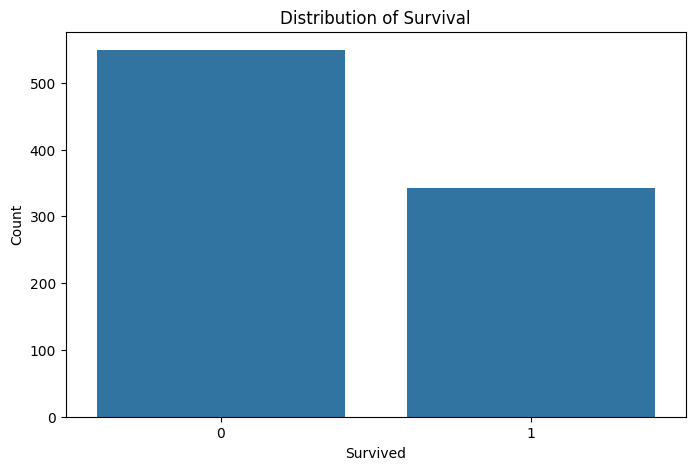

In [9]:
# Plot the distribution of the target variable 'Survived'
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=train)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

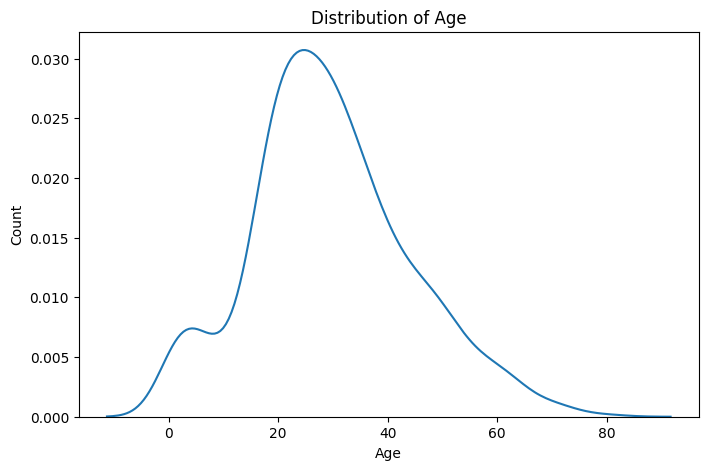

In [10]:
# Plot the distribution of'Age'
plt.figure(figsize=(8,5))
sns.kdeplot(x='Age', data=train)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

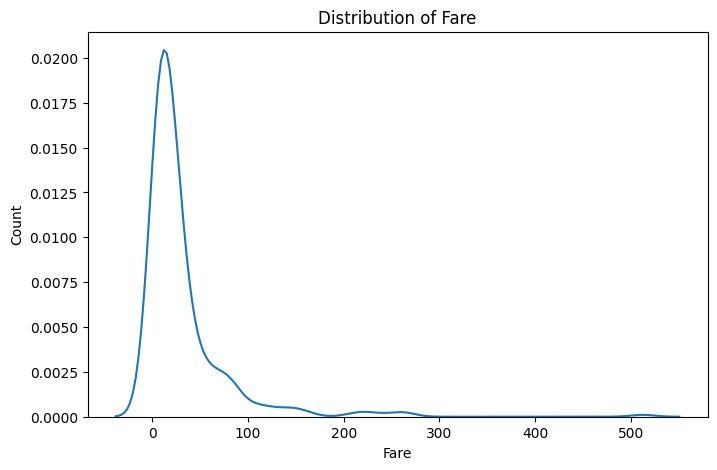

In [11]:
# Plot the distribution of'Fare'
plt.figure(figsize=(8,5))
sns.kdeplot(x='Fare', data=train)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [12]:
# Create FamilySize feature including the passenger themselves
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

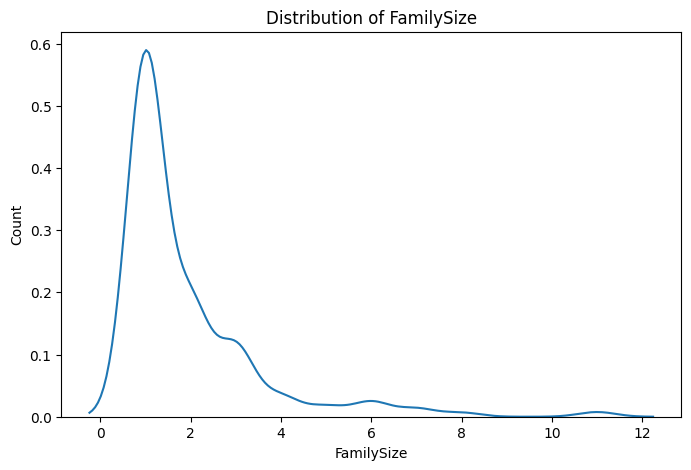

In [13]:
# Plot the distribution of'FamilySize'
plt.figure(figsize=(8,5))
sns.kdeplot(x='FamilySize', data=train)
plt.title('Distribution of FamilySize')
plt.xlabel('FamilySize')
plt.ylabel('Count')
plt.show()

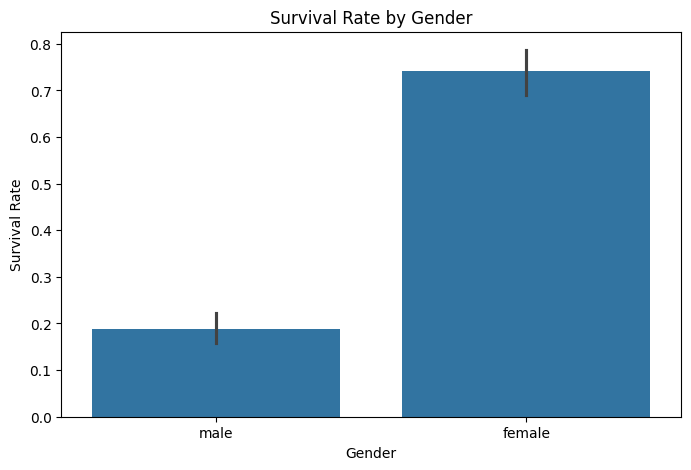

In [14]:
# Survival by Gender
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

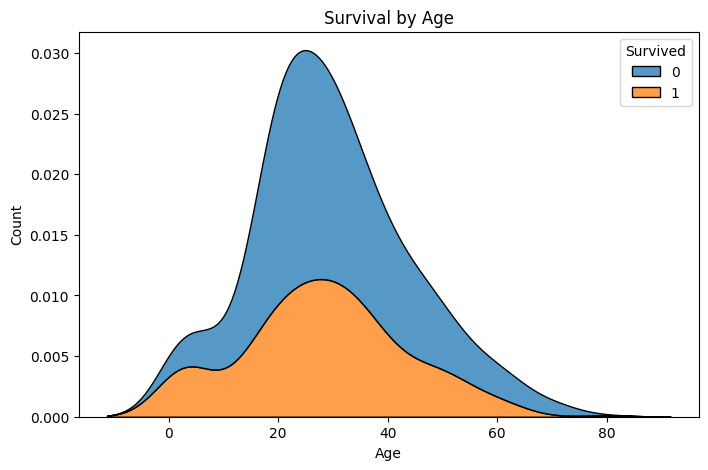

In [15]:
# Survival by Age
plt.figure(figsize=(8,5))
sns.kdeplot(x='Age', hue='Survived', data=train, multiple='stack')
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

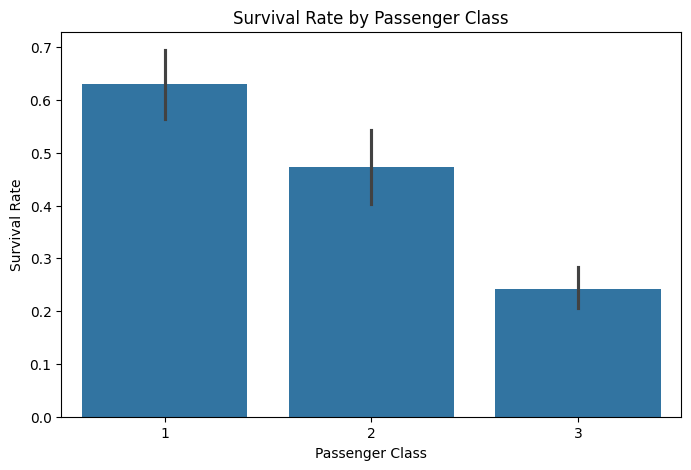

In [16]:
# Survival by Passenge Class
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

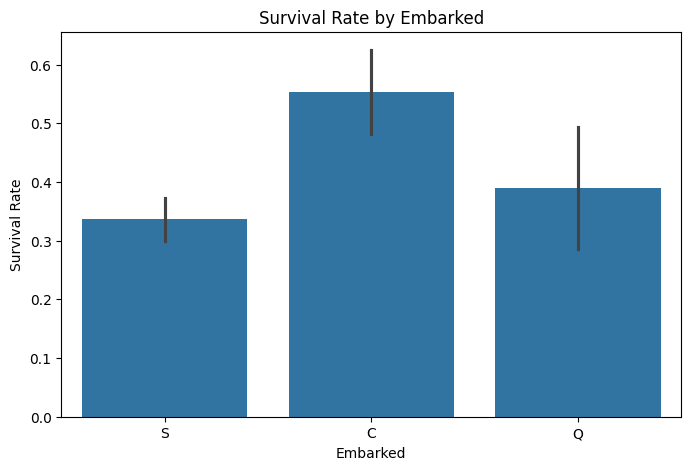

In [17]:
# Survival by Embarked
plt.figure(figsize=(8,5))
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

Correaltion Heatmap

<Axes: >

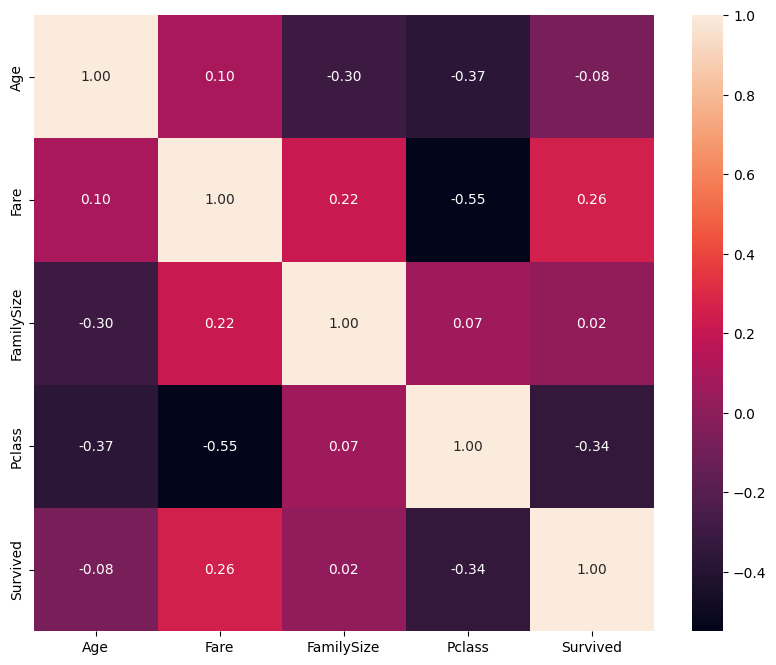

In [18]:
# Correlation heatmap using seaborn
plt.figure(figsize=(10,8))
corr = train[['Age', 'Fare', 'FamilySize', 'Pclass', 'Survived']].corr()
sns.heatmap(corr, annot= True, fmt='.2f')

Feature Engineering Insights


Missing Values by Feature: 
Cabin       687
Age         177
Embarked      2
dtype: int64



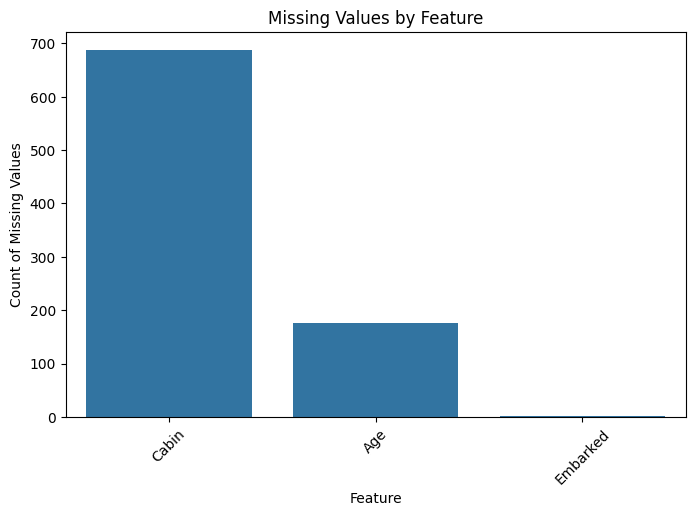

In [19]:
# Missing values vizualization
plt.figure(figsize=(8,5))
missing_data = train.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data>0]
print(f"Missing Values by Feature: \n{missing_data}\n")
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xlabel('Feature')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values by Feature')
plt.xticks(rotation=45)
plt.show()

Preprocessing the data

In [20]:
# Define numeric and categorical features
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
categorical_features = ['Sex', 'Embarked']

In [21]:
# Define Imputers
# Define SimpleImputer and Robust Scaler for numeric features
numeric_imputer = SimpleImputer(strategy='median')
numeric_scaler = RobustScaler()

# Define SimpleImputer and OneHotEncoder for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_encoder = OneHotEncoder(drop='first')

In [22]:
# Define preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', numeric_imputer),
                                ('scaler', numeric_scaler)]), numeric_features),
        ('cat', Pipeline(steps=[('imputer', categorical_imputer),
                                ('encoder', categorical_encoder)]), categorical_features)
    ],
    remainder='passthrough'
)

In [23]:
# Drop Unnecessary Columns
X = train.drop(['Survived', 'Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
test_data = test.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = train['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
331,1,male,45.5,0,0,28.5000,S,1
733,2,male,23.0,0,0,13.0000,S,1
382,3,male,32.0,0,0,7.9250,S,1
704,3,male,26.0,1,0,7.8542,S,2
813,3,female,6.0,4,2,31.2750,S,7


Model Building and Evaluation


In [25]:
# Define classifiers and pipelines
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [26]:
# Train and evaluate models
results = {}
for name, clf in classifiers.items():
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, model_pipeline.predict_proba(X_val)[:,1])
    results[name] = {"Accuracy": accuracy, "ROC AUC": roc_auc}
    print(f"{name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

Logistic Regression - Accuracy: 0.8101, ROC AUC: 0.8826
Random Forest - Accuracy: 0.8045, ROC AUC: 0.8923
Support Vector Machine - Accuracy: 0.8101, ROC AUC: 0.8286
K-Nearest Neighbors - Accuracy: 0.8156, ROC AUC: 0.8588
Decision Tree - Accuracy: 0.7933, ROC AUC: 0.8165
Gradient Boosting - Accuracy: 0.8045, ROC AUC: 0.8879


Save and Load Model

In [27]:
# Select the best model based on ROC AUC (e.g., Random Forest)
model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
    ])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Save the model
dump(model_pipeline, 'best_model_pipeline.joblib')

['best_model_pipeline.joblib']

In [28]:
# Load the model
model = load('best_model_pipeline.joblib')

In [29]:
# Predict with test data
test_predictions = model.predict(test_data)

# Making a new dataframe called Submission
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": test_predictions
})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)